In [ ]:
import os
import shutil
import random

# Définir les chemins des dossiers
data_holo_path = '/content/data/Holo'
data_no_holo_path = '/content/data/No_Holo'
output_dir = '/content/dataset'

# Créer le dossier de sortie s'il n'existe pas
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Créer les sous-dossiers pour train, val et test
for sub_dir in ['train', 'val', 'test']:
    for category in ['Holo', 'No_Holo']:
        os.makedirs(os.path.join(output_dir, sub_dir, category), exist_ok=True)

# Fonction pour diviser les fichiers
def split_data(source_dir, category):
    files = os.listdir(source_dir)
    random.shuffle(files)  # Mélanger les fichiers

    # Calculer les indices de séparation
    total_files = len(files)
    train_end = int(total_files * 0.64)
    val_end = train_end + int(total_files * 0.16)

    # Séparer les fichiers en train, val et test
    train_files = files[:train_end]
    val_files = files[train_end:val_end]
    test_files = files[val_end:]

    # Copier les fichiers dans les bons dossiers
    for file in train_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(output_dir, 'train', category, file))

    for file in val_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(output_dir, 'val', category, file))

    for file in test_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(output_dir, 'test', category, file))

# Diviser les fichiers Holo
split_data(data_holo_path, 'Holo')

# Diviser les fichiers No_Holo
split_data(data_no_holo_path, 'No_Holo')

print("La division des fichiers est terminée.")


La division des fichiers est terminée.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [ ]:
# dataset_path = '/content/drive/MyDrive/dataset/'
# train_dir = '/content/drive/MyDrive/dataset/train'  # Répertoire d'entraînement
# valid_dir = '/content/drive/MyDrive/dataset/val'   # Répertoire de validation
# test_dir = '/content/drive/MyDrive/dataset/test'   # Répertoire de test

In [ ]:
!unzip /content/drive/MyDrive/train.zip -d /content/dataset

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: /content/dataset/train/No_Holo/psp06_01_01_mosaic_77_fraud_photo_holo_copy.png  
  inflating: /content/dataset/train/No_Holo/psp06_01_01_mosaic_78_fraud_photo_holo_copy.png  
  inflating: /content/dataset/train/No_Holo/psp06_01_01_mosaic_79_fraud_copy_without_holo.png  
  inflating: /content/dataset/train/No_Holo/psp06_01_01_mosaic_79_fraud_photo_holo_copy.png  
  inflating: /content/dataset/train/No_Holo/psp06_01_01_mosaic_81_fraud_copy_without_holo.png  
  inflating: /content/dataset/train/No_Holo/psp06_01_01_mosaic_81_fraud_photo_holo_copy.png  
  inflating: /content/dataset/train/No_Holo/psp06_01_01_mosaic_82_fraud_copy_without_holo.png  
  inflating: /content/dataset/train/No_Holo/psp06_01_01_mosaic_82_fraud_photo_holo_copy.png  
  inflating: /content/dataset/train/No_Holo/psp06_01_01_mosaic_85_fraud_pseudo_holo_copy.png  
  inflating: /content/dataset/train/No_Holo/psp06_01_01_mosaic_86_fra

In [ ]:
!unzip /content/val.zip -d /content/dataset

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: /content/dataset/val/Holo/psp08_04_01_mosaic_197_origins_holo.png  
  inflating: /content/dataset/val/Holo/psp08_04_01_mosaic_197_origins_holo_offse1.png  
  inflating: /content/dataset/val/Holo/psp08_04_01_mosaic_197_origins_holo_offse2.png  
  inflating: /content/dataset/val/Holo/psp08_04_01_mosaic_197_origins_holo_offse3.png  
  inflating: /content/dataset/val/Holo/psp08_04_01_mosaic_197_origins_holo_offse4.png  
  inflating: /content/dataset/val/Holo/psp08_04_01_mosaic_208_origins_holo_offse2.png  
  inflating: /content/dataset/val/Holo/psp08_04_01_mosaic_208_origins_holo_offse3.png  
  inflating: /content/dataset/val/Holo/psp08_04_01_mosaic_209_origins_holo.png  
  inflating: /content/dataset/val/Holo/psp08_04_01_mosaic_209_origins_holo_offse1.png  
  inflating: /content/dataset/val/Holo/psp08_04_01_mosaic_209_origins_holo_offse2.png  
  inflating: /content/dataset/val/Holo/psp08_04_01_mosai

In [ ]:
!unzip /content/test.zip -d /content/dataset

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: /content/dataset/test/Holo/psp09_01_03_mosaic_99_origins_holo_offse1.png  
  inflating: /content/dataset/test/Holo/psp09_01_03_mosaic_99_origins_holo_offse2.png  
  inflating: /content/dataset/test/Holo/psp09_01_03_mosaic_99_origins_holo_offse3.png  
  inflating: /content/dataset/test/Holo/psp09_01_03_mosaic_99_origins_holo_offse4.png  
  inflating: /content/dataset/test/Holo/psp10_01_01_mosaic_112_origins_holo_offse3.png  
  inflating: /content/dataset/test/Holo/psp10_01_01_mosaic_112_origins_holo_offse4.png  
  inflating: /content/dataset/test/Holo/psp10_01_01_mosaic_116_origins_holo.png  
  inflating: /content/dataset/test/Holo/psp10_01_01_mosaic_116_origins_holo_offse1.png  
  inflating: /content/dataset/test/Holo/psp10_01_01_mosaic_116_origins_holo_offse2.png  
  inflating: /content/dataset/test/Holo/psp10_01_01_mosaic_116_origins_holo_offse3.png  
  inflating: /content/dataset/test/Holo/psp

In [ ]:
import shutil

# Define the source and destination paths
dataset_path ='/content/drive/MyDrive/dataset/train'  # Adjust the path as necessary
destination_path = '/content/dataset'
# Move the file
shutil.move(dataset_path, destination_path)

In [ ]:
import shutil

# Define the source and destination paths
dataset_path ='/content/drive/MyDrive/dataset/'  # Adjust the path as necessary
destination_path = '/content'
# Move the file
shutil.move(dataset_path, destination_path)



'/content/dataset'

In [ ]:
dataset_path = '/content/dataset/'

In [ ]:
# Paramètres
img_height, img_width = 224, 224
batch_size = 32

# Générateurs d'images pour le train, validation et test
train_datagen = ImageDataGenerator(
    rescale=1./255,               # Normalisation des pixels
    brightness_range=[0.8, 1.2],  # Variation de la luminosité entre 80% et 120%
    horizontal_flip=True,         # Retourner les images horizontalement
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    dataset_path + 'train/',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # 'binary' pour deux classes: Holo et No_Holo
    classes=['No_Holo', 'Holo'],
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    dataset_path + 'val/',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    classes=['No_Holo', 'Holo'],
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    dataset_path + 'test/',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    classes=['No_Holo', 'Holo'],
    shuffle=False
)


Found 30261 images belonging to 2 classes.
Found 7560 images belonging to 2 classes.
Found 9450 images belonging to 2 classes.


In [ ]:
print("Class indices:", test_generator.class_indices)
print("Class indices:",validation_generator.class_indices)
print("Class indices:",test_generator.class_indices)

Class indices: {'No_Holo': 0, 'Holo': 1}
Class indices: {'No_Holo': 0, 'Holo': 1}
Class indices: {'No_Holo': 0, 'Holo': 1}


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Chargement du modèle EfficientNetB0 pré-entraîné
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

for layer in base_model.layers:
    layer.trainable = False

# Unfreeze les dernières couches
for layer in base_model.layers[-11:]:
    layer.trainable = True

# Ajouter des couches personnalisées
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)   # Pour une classification binaire

# Créer le modèle final
model = Model(inputs=base_model.input, outputs=predictions)

# Étape 4: Compiler et entraîner le modèle
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Afficher les couches déverrouillées et compter le nombre de couches entraînables
trainable_count = 0
for layer in base_model.layers:
    if layer.trainable:
        print(layer.name)
        trainable_count += 1

print(f"Nombre de couches entraînables: {trainable_count}")

input_layer_4
Conv1
bn_Conv1
Conv1_relu
expanded_conv_depthwise
expanded_conv_depthwise_BN
expanded_conv_depthwise_relu
expanded_conv_project
expanded_conv_project_BN
block_1_expand
block_1_expand_BN
block_1_expand_relu
block_1_pad
block_1_depthwise
block_1_depthwise_BN
block_1_depthwise_relu
block_1_project
block_1_project_BN
block_2_expand
block_2_expand_BN
block_2_expand_relu
block_2_depthwise
block_2_depthwise_BN
block_2_depthwise_relu
block_2_project
block_2_project_BN
block_2_add
block_3_expand
block_3_expand_BN
block_3_expand_relu
block_3_pad
block_3_depthwise
block_3_depthwise_BN
block_3_depthwise_relu
block_3_project
block_3_project_BN
block_4_expand
block_4_expand_BN
block_4_expand_relu
block_4_depthwise
block_4_depthwise_BN
block_4_depthwise_relu
block_4_project
block_4_project_BN
block_4_add
block_5_expand
block_5_expand_BN
block_5_expand_relu
block_5_depthwise
block_5_depthwise_BN
block_5_depthwise_relu
block_5_project
block_5_project_BN
block_5_add
block_6_expand
block_6_

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
# Entraîner le modèle
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=validation_generator,
                    callbacks=[early_stopping, reduce_lr, model_checkpoint])

Epoch 1/30
946/946 ━━━━━━━━━━━━━━━━━━━━ 172s 169ms/step - accuracy: 0.8291 - loss: 0.3652 - val_accuracy: 0.6792 - val_loss: 1.6540 - learning_rate: 1.0000e-04
Epoch 2/30
946/946 ━━━━━━━━━━━━━━━━━━━━ 155s 164ms/step - accuracy: 0.9179 - loss: 0.2022 - val_accuracy: 0.7647 - val_loss: 0.9673 - learning_rate: 1.0000e-04
Epoch 3/30
946/946 ━━━━━━━━━━━━━━━━━━━━ 202s 164ms/step - accuracy: 0.9391 - loss: 0.1512 - val_accuracy: 0.8653 - val_loss: 0.4056 - learning_rate: 1.0000e-04
Epoch 4/30
946/946 ━━━━━━━━━━━━━━━━━━━━ 201s 163ms/step - accuracy: 0.9553 - loss: 0.1146 - val_accuracy: 0.8149 - val_loss: 0.5523 - learning_rate: 1.0000e-04
Epoch 5/30
946/946 ━━━━━━━━━━━━━━━━━━━━ 156s 164ms/step - accuracy: 0.9635 - loss: 0.0946 - val_accuracy: 0.8823 - val_loss: 0.3916 - learning_rate: 1.0000e-04
Epoch 6/30
946/946 ━━━━━━━━━━━━━━━━━━━━ 155s 163ms/step - accuracy: 0.9718 - loss: 0.0766 - val_accuracy: 0.8817 - val_loss: 0.4370 - learning_rate: 1.0000e-04
Epoch 7/30
946/946 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
from keras.models import load_model

# Load the best model
best_model = load_model('best_model.keras')

In [ ]:
# Étape 5: Évaluer le modèle
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')

296/296 ━━━━━━━━━━━━━━━━━━━━ 27s 89ms/step - accuracy: 0.8951 - loss: 0.4789
Test accuracy: 0.7277248501777649


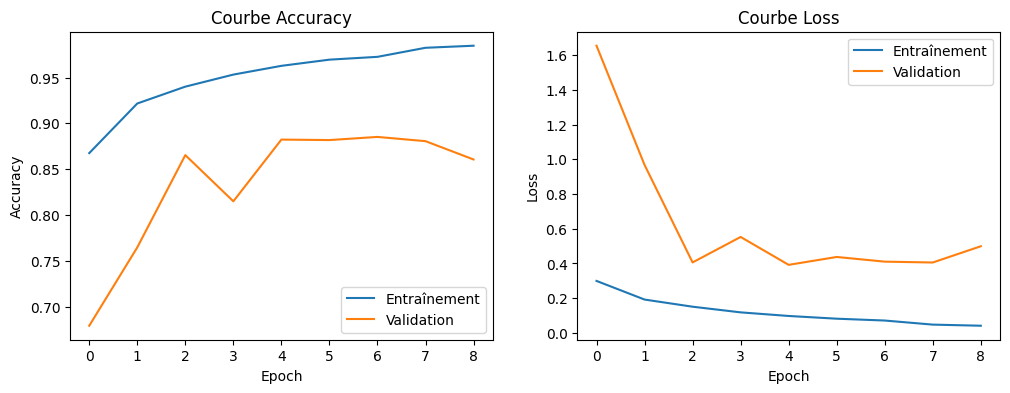

In [ ]:
import matplotlib.pyplot as plt

# Fonction pour tracer les courbes de performance
def plot_history(history):
    # Précision de l'entraînement et de la validation
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Entraînement')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Courbe Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Perte de l'entraînement et de la validation
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Entraînement')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Courbe Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Appeler la fonction pour tracer les courbes
plot_history(history)


In [ ]:
model.save('best_model_cnn.keras')

296/296 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step
              precision    recall  f1-score   support

     No_Holo       0.72      0.99      0.83      4500
        Holo       0.99      0.64      0.78      4950

    accuracy                           0.81      9450
   macro avg       0.85      0.82      0.81      9450
weighted avg       0.86      0.81      0.81      9450



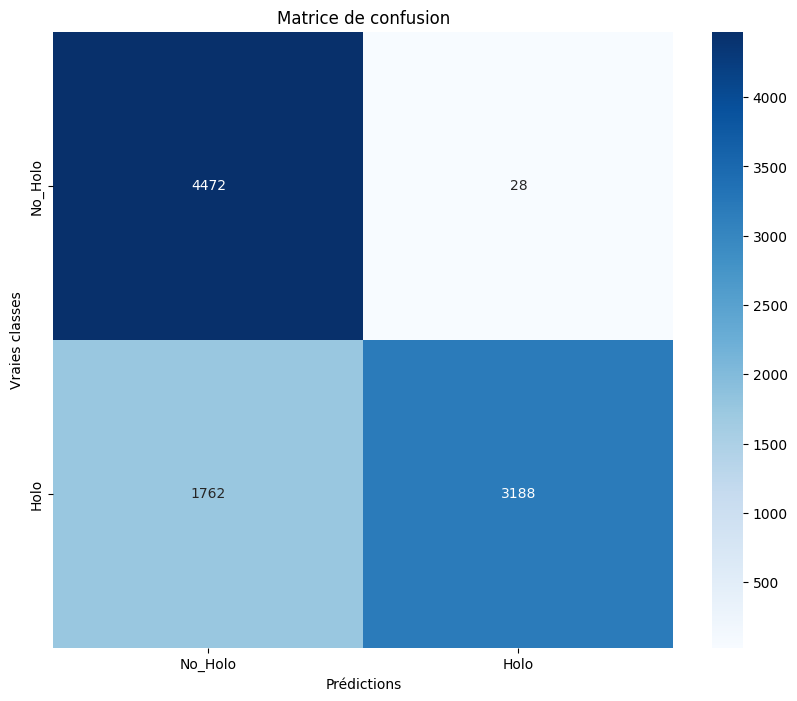

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Prédire les classes sur les données de test
Y_pred = model.predict(test_generator)
y_pred = (Y_pred > 0.5).astype(int)

# Obtenir les vraies classes
y_true = test_generator.classes

# Calculer le rapport de classification (F1-score inclus)
report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
print(report)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Prédictions')
plt.ylabel('Vraies classes')
plt.title('Matrice de confusion')
plt.show()


In [ ]:
import numpy as np

# Assurez-vous que votre objet history existe
# Récupérer les indices de l'époque avec la meilleure perte de validation
best_epoch = np.argmin(history.history['val_loss'])  # index de l'époque où val_loss est le plus bas

# Afficher la meilleure valeur de val_loss et l'époque correspondante
print(f"Meilleur val_loss : {history.history['val_loss'][best_epoch]} à l'époque {best_epoch + 1}")


Meilleur val_loss : 0.20179860293865204 à l'époque 5


#Prediction

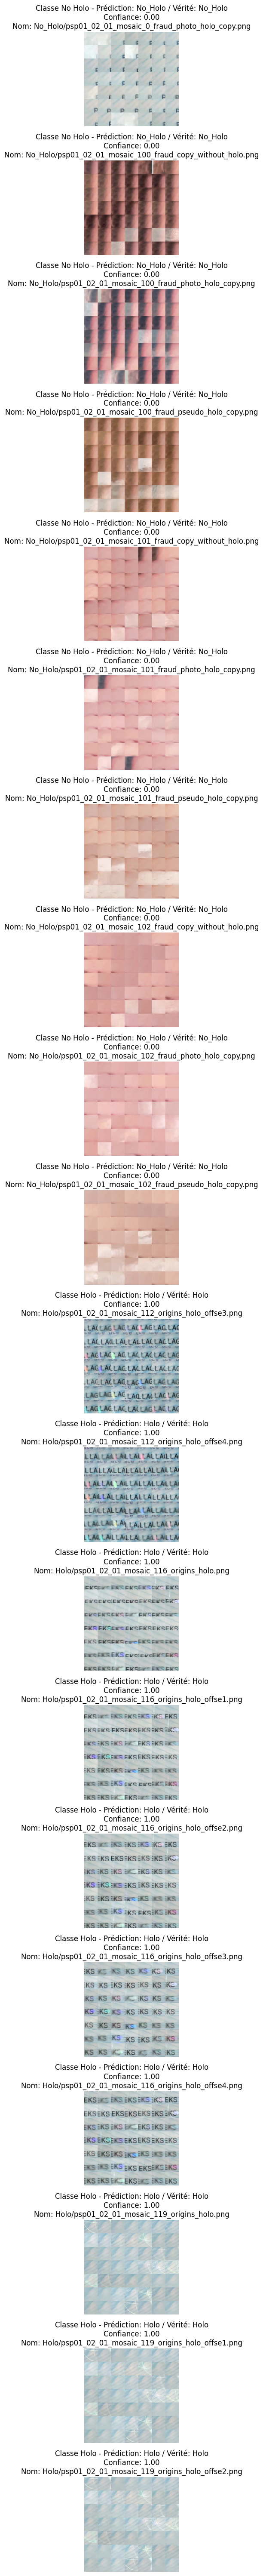

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Supposons que vous avez déjà les prédictions et les vérités
# y_pred : prédictions du modèle
# y_true : vérités des labels
# labels : liste des classes

# Identifier les bonnes prédictions pour chaque classe
class_1 = 0  # Remplacez par l'indice de la première classe
class_2 = 1  # Remplacez par l'indice de la deuxième classe

# Trouver les bonnes prédictions pour chaque classe
correct_predictions_class_1 = np.where((y_pred.flatten() == y_true) & (y_true == class_1))[0]
correct_predictions_class_2 = np.where((y_pred.flatten() == y_true) & (y_true == class_2))[0]

# Nombre d'exemples à afficher
num_correct_to_display_1 = min(len(correct_predictions_class_1), 10)  # Afficher jusqu'à 10 bonnes prédictions pour la classe 1
num_correct_to_display_2 = min(len(correct_predictions_class_2), 10)  # Afficher jusqu'à 10 bonnes prédictions pour la classe 2

# Créer une figure pour afficher les bonnes prédictions
plt.figure(figsize=(15, 3 * (num_correct_to_display_1 + num_correct_to_display_2)))  # Ajuster la taille de la figure

# Afficher les bonnes prédictions pour la classe 1
for i, index in enumerate(correct_predictions_class_1[:num_correct_to_display_1]):
    batch_size = test_generator.batch_size
    batch_index = index // batch_size
    img_index = index % batch_size

    img_batch, label_batch = test_generator[batch_index]
    img = img_batch[img_index]

    confidence = Y_pred[index][0]
    predicted_label = labels[y_pred[index][0]]
    true_label = labels[y_true[index]]

    image_name = test_generator.filenames[batch_index * batch_size + img_index]

    plt.subplot(num_correct_to_display_1 + num_correct_to_display_2, 1, i + 1)  # Arranger dans une colonne
    plt.imshow(img)
    plt.title(f'Classe No Holo - Prédiction: {predicted_label} / Vérité: {true_label}\nConfiance: {confidence:.2f}\nNom: {image_name}')
    plt.axis('off')

# Afficher les bonnes prédictions pour la classe 2
for i, index in enumerate(correct_predictions_class_2[:num_correct_to_display_2]):
    batch_size = test_generator.batch_size
    batch_index = index // batch_size
    img_index = index % batch_size

    img_batch, label_batch = test_generator[batch_index]
    img = img_batch[img_index]

    confidence = Y_pred[index][0]
    predicted_label = labels[y_pred[index][0]]
    true_label = labels[y_true[index]]

    image_name = test_generator.filenames[batch_index * batch_size + img_index]

    plt.subplot(num_correct_to_display_1 + num_correct_to_display_2, 1, num_correct_to_display_1 + i + 1)  # Arranger dans une colonne
    plt.imshow(img)
    plt.title(f'Classe Holo - Prédiction: {predicted_label} / Vérité: {true_label}\nConfiance: {confidence:.2f}\nNom: {image_name}')
    plt.axis('off')

plt.tight_layout()
plt.show()


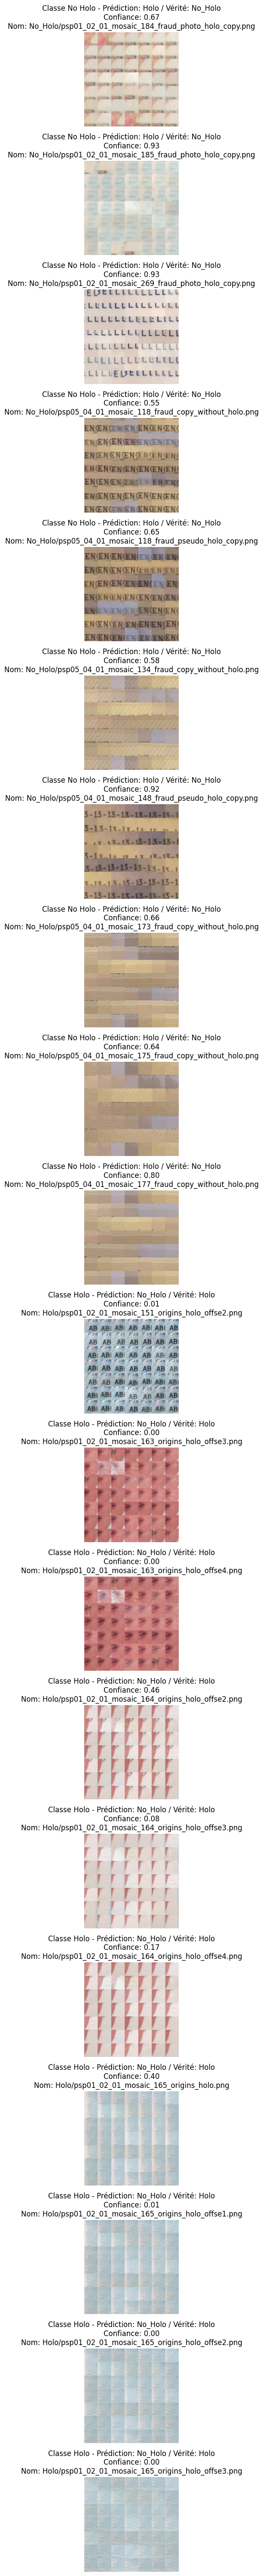

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Supposons que vous avez déjà les prédictions et les vérités
# y_pred : prédictions du modèle
# y_true : vérités des labels
# labels : liste des classes

# Identifier les classes
class_1 = 0  # Remplacez par l'indice de la première classe
class_2 = 1  # Remplacez par l'indice de la deuxième classe

# Trouver les erreurs de prédiction pour chaque classe
wrong_predictions_class_1 = np.where((y_pred.flatten() != y_true) & (y_true == class_1))[0]
wrong_predictions_class_2 = np.where((y_pred.flatten() != y_true) & (y_true == class_2))[0]

# Nombre d'exemples à afficher
num_wrong_to_display_1 = min(len(wrong_predictions_class_1), 10)  # Afficher jusqu'à 10 erreurs pour la classe 1
num_wrong_to_display_2 = min(len(wrong_predictions_class_2), 10)  # Afficher jusqu'à 10 erreurs pour la classe 2

# Créer une figure pour afficher les erreurs de prédiction
plt.figure(figsize=(15, 3 * (num_wrong_to_display_1 + num_wrong_to_display_2)))  # Ajuster la taille de la figure

# Afficher les erreurs de prédiction pour la classe 1
for i, index in enumerate(wrong_predictions_class_1[:num_wrong_to_display_1]):
    batch_size = test_generator.batch_size
    batch_index = index // batch_size
    img_index = index % batch_size

    img_batch, label_batch = test_generator[batch_index]
    img = img_batch[img_index]

    confidence = Y_pred[index][0]
    predicted_label = labels[y_pred[index][0]]
    true_label = labels[y_true[index]]

    image_name = test_generator.filenames[batch_index * batch_size + img_index]

    plt.subplot(num_wrong_to_display_1 + num_wrong_to_display_2, 1, i + 1)  # Arranger dans une colonne
    plt.imshow(img)
    plt.title(f'Classe No Holo - Prédiction: {predicted_label} / Vérité: {true_label}\nConfiance: {confidence:.2f}\nNom: {image_name}')
    plt.axis('off')

# Afficher les erreurs de prédiction pour la classe 2
for i, index in enumerate(wrong_predictions_class_2[:num_wrong_to_display_2]):
    batch_size = test_generator.batch_size
    batch_index = index // batch_size
    img_index = index % batch_size

    img_batch, label_batch = test_generator[batch_index]
    img = img_batch[img_index]

    confidence = Y_pred[index][0]
    predicted_label = labels[y_pred[index][0]]
    true_label = labels[y_true[index]]

    image_name = test_generator.filenames[batch_index * batch_size + img_index]

    plt.subplot(num_wrong_to_display_1 + num_wrong_to_display_2, 1, num_wrong_to_display_1 + i + 1)  # Arranger dans une colonne
    plt.imshow(img)
    plt.title(f'Classe Holo - Prédiction: {predicted_label} / Vérité: {true_label}\nConfiance: {confidence:.2f}\nNom: {image_name}')
    plt.axis('off')

plt.tight_layout()
plt.show()


## INFERENCE

In [ ]:
!unzip /content/psp01_02_01.zip

Archive:  /content/psp01_02_01.zip
   creating: psp01_02_01/
  inflating: psp01_02_01/psp01_02_01_mosaic_0_fraud_copy_without_holo.png  
  inflating: psp01_02_01/psp01_02_01_mosaic_100_fraud_copy_without_holo.png  
  inflating: psp01_02_01/psp01_02_01_mosaic_101_fraud_copy_without_holo.png  
  inflating: psp01_02_01/psp01_02_01_mosaic_102_fraud_copy_without_holo.png  
  inflating: psp01_02_01/psp01_02_01_mosaic_103_fraud_copy_without_holo.png  
  inflating: psp01_02_01/psp01_02_01_mosaic_104_fraud_copy_without_holo.png  
  inflating: psp01_02_01/psp01_02_01_mosaic_105_fraud_copy_without_holo.png  
  inflating: psp01_02_01/psp01_02_01_mosaic_106_fraud_copy_without_holo.png  
  inflating: psp01_02_01/psp01_02_01_mosaic_107_fraud_copy_without_holo.png  
  inflating: psp01_02_01/psp01_02_01_mosaic_108_fraud_copy_without_holo.png  
  inflating: psp01_02_01/psp01_02_01_mosaic_109_fraud_copy_without_holo.png  
  inflating: psp01_02_01/psp01_02_01_mosaic_10_fraud_copy_without_holo.png  
  infl

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import re
import tensorflow as tf  # Assurez-vous d'importer tensorflow si ce n'est pas déjà fait

# Chemin du dossier contenant les fichiers ZIP
base_folder_path = '/content/origins'  # Chemin de base

# Fonction pour charger et prétraiter une image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch
    img_array /= 255.0  # Normaliser l'image
    return img_array

# Fonction de tri personnalisé pour les fichiers
def sort_nicely(l):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

# Charger votre modèle
model = tf.keras.models.load_model('/content/best_model.keras')

# Liste pour stocker les heatmaps
heatmaps = []

# Dossiers à traiter
# folders_to_process = [f for f in os.listdir(base_folder_path) if os.path.isdir(os.path.join(base_folder_path, f))]
folders_to_process = ['/content/psp01_02_01']

for folder in folders_to_process:
    # Répertoire contenant les images à prédire
    images_dir = os.path.join(base_folder_path, folder)

    # Charger et trier les chemins des images
    image_paths = [os.path.join(images_dir, img) for img in os.listdir(images_dir)]
    image_paths = sort_nicely(image_paths)

    # Initialiser un tableau pour stocker les prédictions
    predictions = []

    # Faire des prédictions pour chaque image
    for img_path in image_paths:
        img = load_and_preprocess_image(img_path)
        prediction = model.predict(img)
        predicted_class = 1 if prediction > 0.5 else 0  # 1 pour Holo, 0 pour No_Holo
        predictions.append(predicted_class)

    # Convertir les prédictions en tableau numpy
    predictions = np.array(predictions)

    # Compter le nombre de Holo et No_Holo
    nb_holo = np.sum(predictions == 1)  # Holo
    nb_no_holo = np.sum(predictions == 0)  # No_Holo

    # Reshape pour créer une matrice de 15x20 (15 lignes et 20 colonnes)
    heatmap_data = predictions.reshape((15, 20))

    # Stocker la heatmap dans la liste
    heatmaps.append((heatmap_data, nb_holo, nb_no_holo))


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━

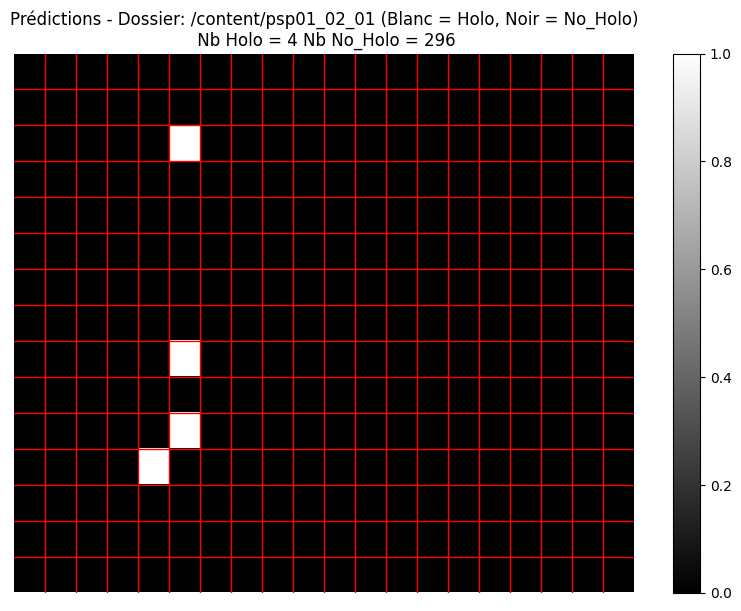

In [ ]:
# Afficher toutes les heatmaps
for i, (heatmap_data, nb_holo, nb_no_holo) in enumerate(heatmaps):
    plt.figure(figsize=(10, 7))  # Ajustez la taille de la figure si nécessaire
    plt.imshow(heatmap_data, cmap='binary_r', aspect='auto', vmin=0, vmax=1)

    # Ajouter des lignes rouges pour séparer les cases
    num_rows, num_cols = heatmap_data.shape
    for r in range(1, num_rows):
        plt.axhline(y=r - 0.5, color='red', linewidth=1)
    for c in range(1, num_cols):
        plt.axvline(x=c - 0.5, color='red', linewidth=1)

    plt.colorbar()
    plt.title(f'Prédictions - Dossier: {folders_to_process[i]} (Blanc = Holo, Noir = No_Holo)\n Nb Holo = {nb_holo} Nb No_Holo = {nb_no_holo}')
    plt.axis('off')
    plt.show()


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import re
import tensorflow as tf  # Assurez-vous d'importer tensorflow si ce n'est pas déjà fait

# Chemin du dossier contenant les fichiers ZIP
base_folder_path = '/content/origins'  # Chemin de base

# Fonction pour charger et prétraiter une image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch
    img_array /= 255.0  # Normaliser l'image
    return img_array

# Fonction de tri personnalisé pour les fichiers
def sort_nicely(l):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

# Charger votre modèle
model = tf.keras.models.load_model('/content/best_model.keras.keras')

# Liste pour stocker les heatmaps
heatmaps = []

# Dossiers à traiter
folders_to_process = [f for f in os.listdir(base_folder_path) if os.path.isdir(os.path.join(base_folder_path, f))]

for folder in folders_to_process:
    # Répertoire contenant les images à prédire
    images_dir = os.path.join(base_folder_path, folder)

    # Charger et trier les chemins des images
    image_paths = [os.path.join(images_dir, img) for img in os.listdir(images_dir)]
    image_paths = sort_nicely(image_paths)

    # Initialiser un tableau pour stocker les prédictions
    predictions = []

    # Faire des prédictions pour chaque image
    for img_path in image_paths:
        img = load_and_preprocess_image(img_path)
        prediction = model.predict(img)
        predicted_class = 1 if prediction > 0.5 else 0  # 1 pour No_Holo, 0 pour Holo
        predictions.append(predicted_class)

    # Convertir les prédictions en tableau numpy
    predictions = np.array(predictions)

    # Compter le nombre de Holo et No_Holo
    nb_holo = np.sum(predictions == 1)  # Holo
    nb_no_holo = np.sum(predictions == 0)  # No_Holo

    # Reshape pour créer une matrice de 15x20 (15 lignes et 20 colonnes)
    heatmap_data = predictions.reshape((15, 20))

    # Stocker la heatmap dans la liste
    heatmaps.append((heatmap_data, nb_holo, nb_no_holo))


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━

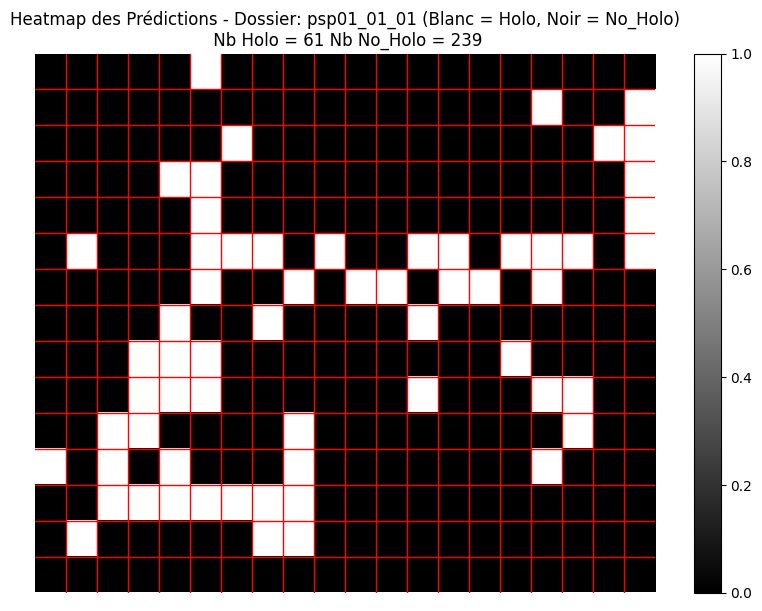

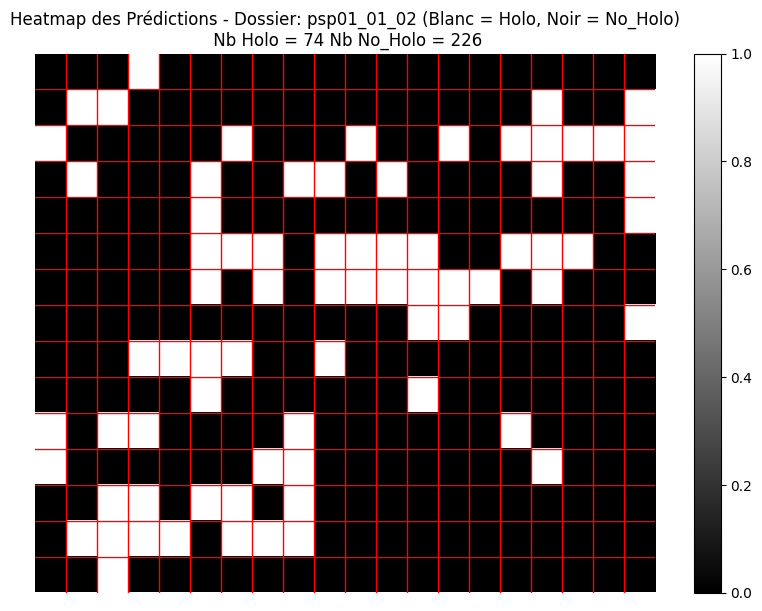

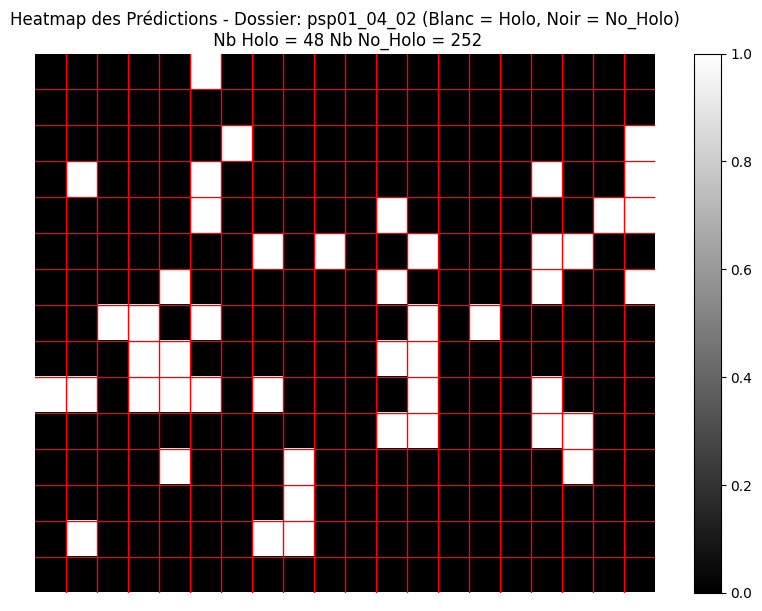

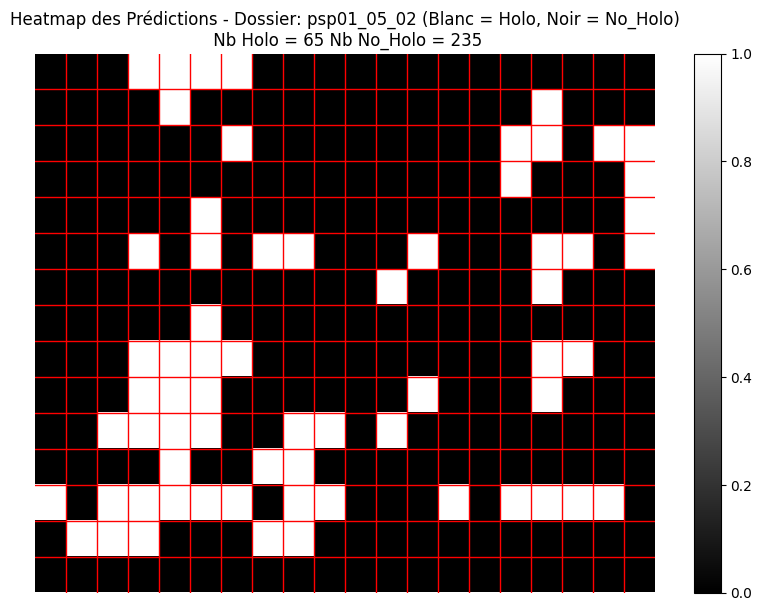

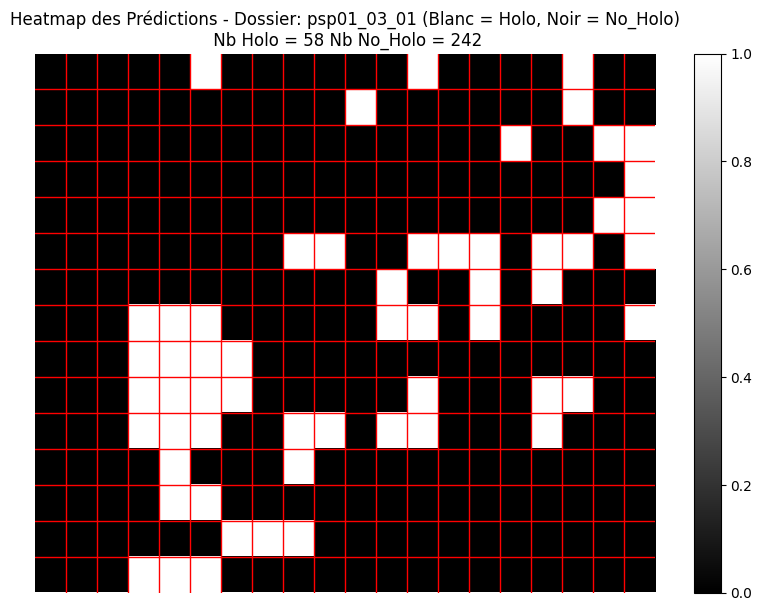

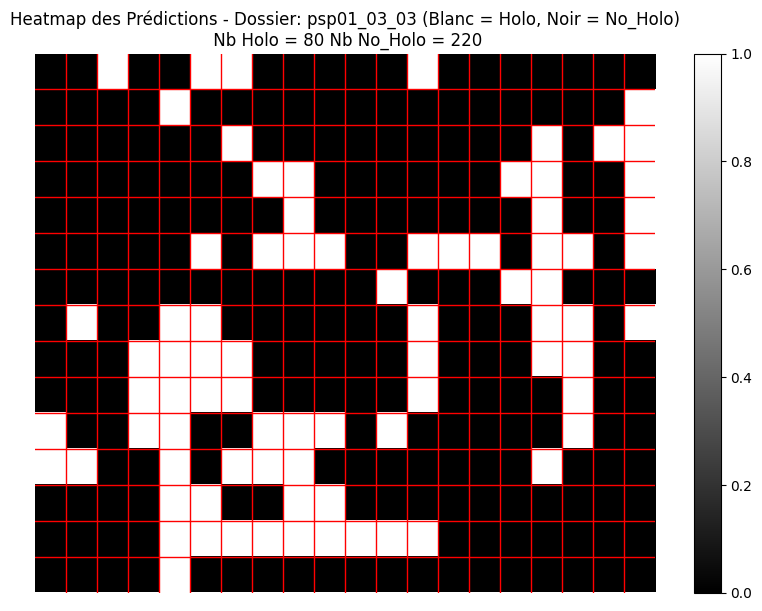

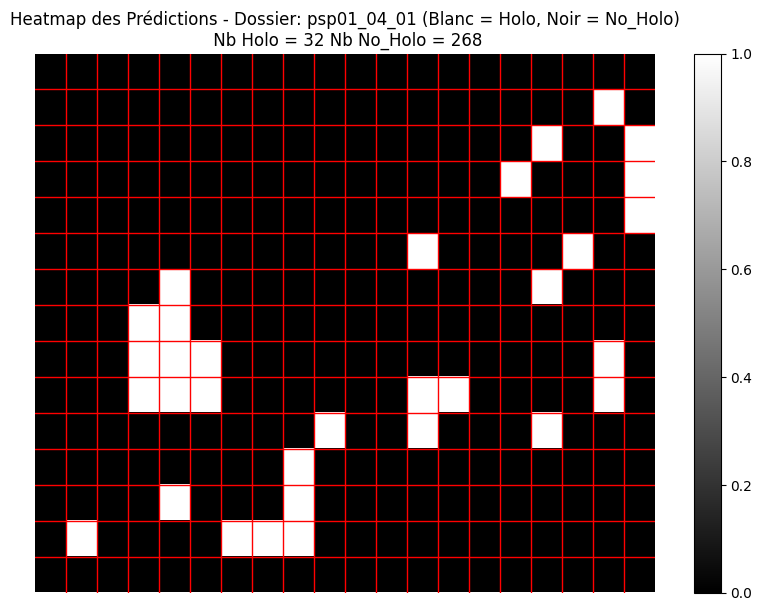

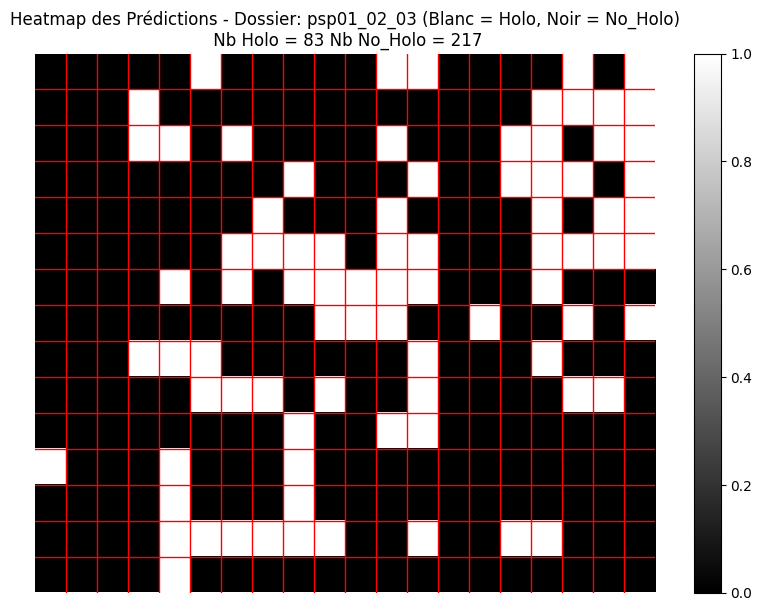

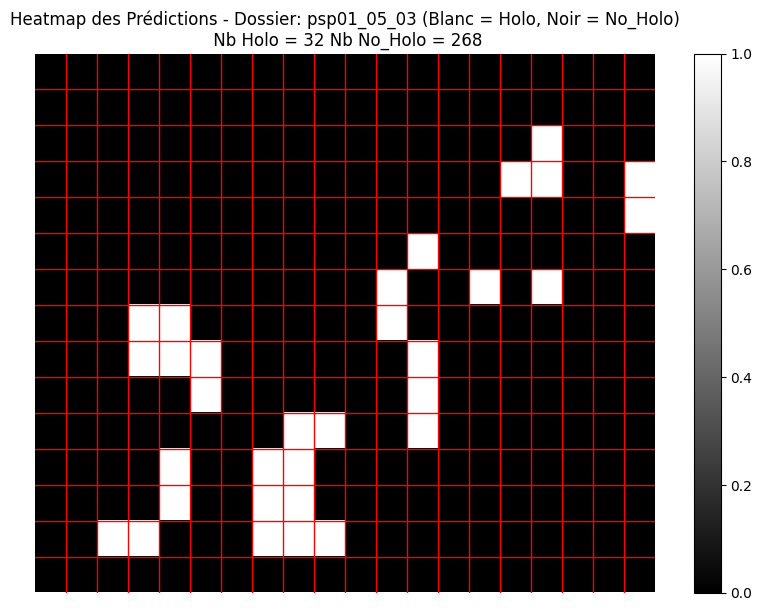

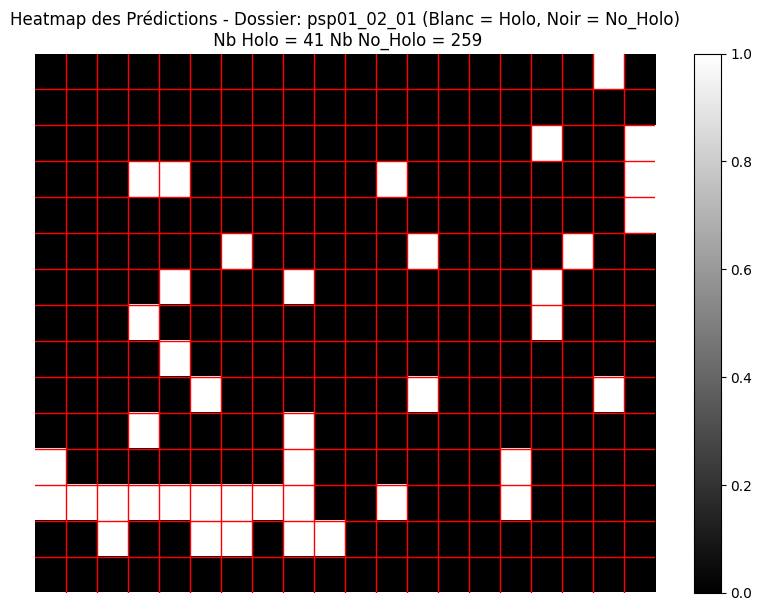

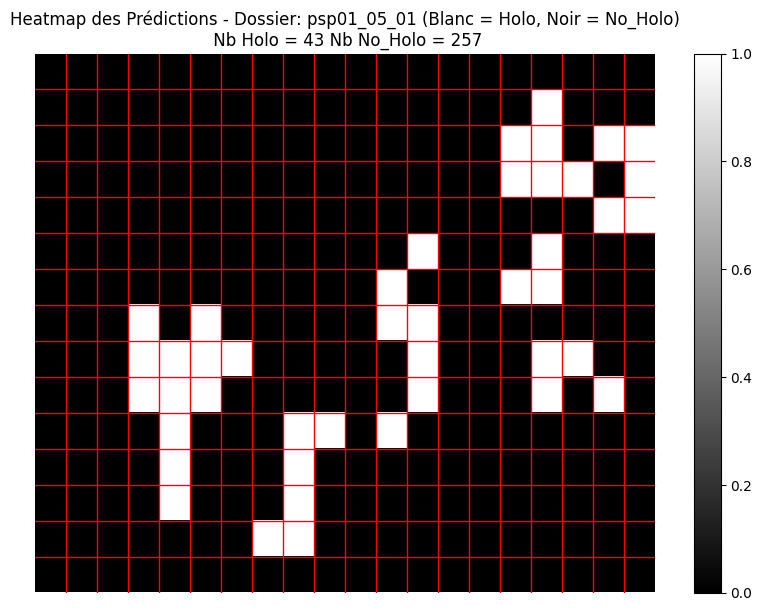

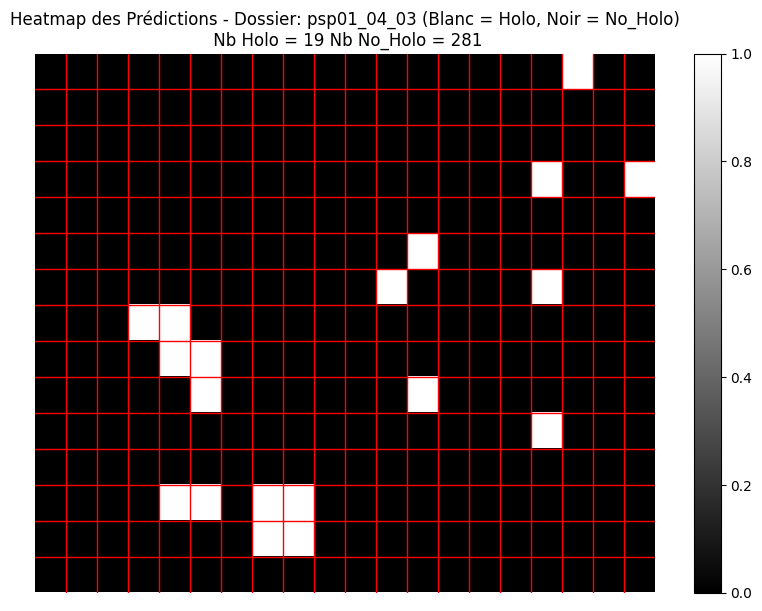

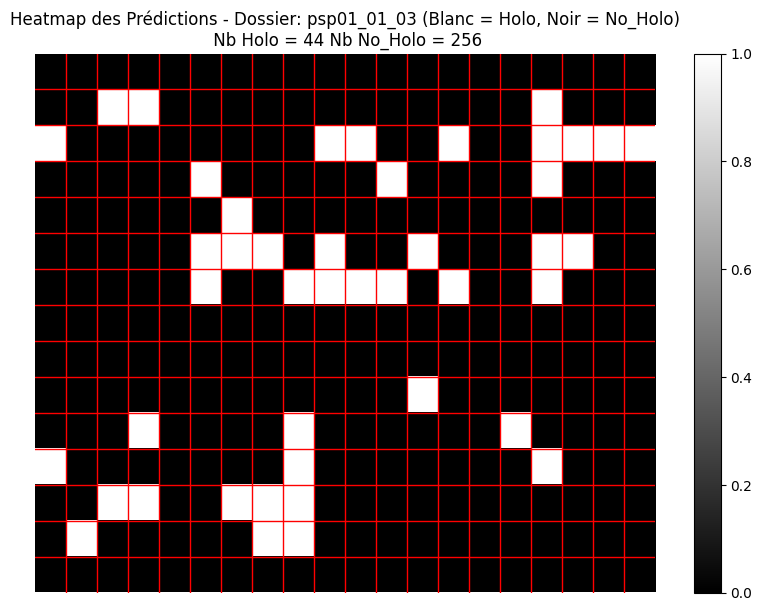

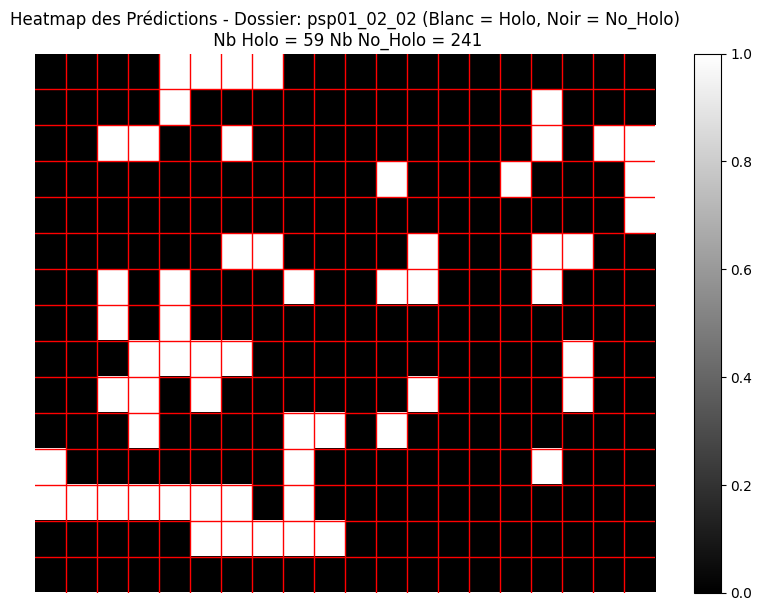

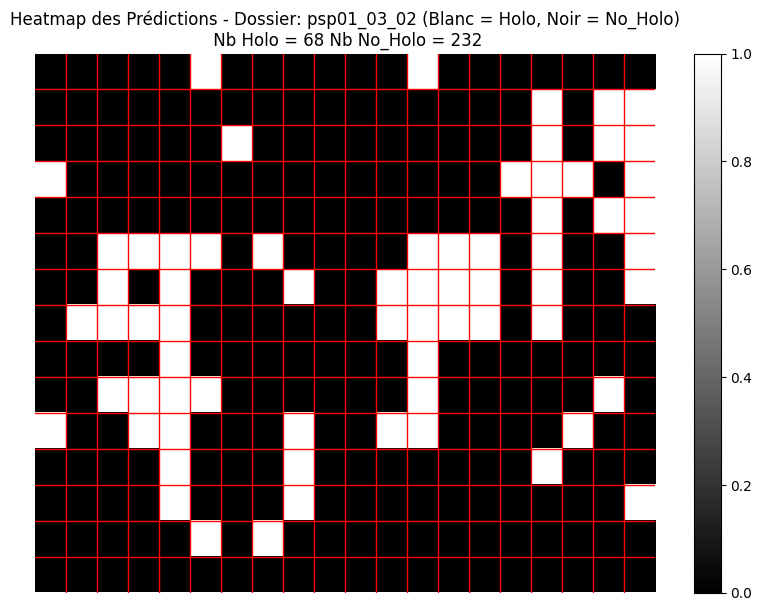

In [ ]:
# Afficher toutes les heatmaps
for i, (heatmap_data, nb_holo, nb_no_holo) in enumerate(heatmaps):
    plt.figure(figsize=(10, 7))  # Ajustez la taille de la figure si nécessaire
    plt.imshow(heatmap_data, cmap='binary_r', aspect='auto', vmin=0, vmax=1)

    # Ajouter des lignes rouges pour séparer les cases
    num_rows, num_cols = heatmap_data.shape
    for r in range(1, num_rows):
        plt.axhline(y=r - 0.5, color='red', linewidth=1)
    for c in range(1, num_cols):
        plt.axvline(x=c - 0.5, color='red', linewidth=1)

    plt.colorbar()
    plt.title(f'Heatmap des Prédictions - Dossier: {folders_to_process[i]} (Blanc = Holo, Noir = No_Holo)\n Nb Holo = {nb_holo} Nb No_Holo = {nb_no_holo}')
    plt.axis('off')
    plt.show()


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import re
import tensorflow as tf  # Assurez-vous d'importer tensorflow si ce n'est pas déjà fait

# Chemin du dossier contenant les fichiers ZIP
base_folder_path = '/content/copy_without_holo'  # Chemin de base

# Fonction pour charger et prétraiter une image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch
    img_array /= 255.0  # Normaliser l'image
    return img_array

# Fonction de tri personnalisé pour les fichiers
def sort_nicely(l):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

# Charger votre modèle
model = tf.keras.models.load_model('/content/best_model_cnn.keras')

# Liste pour stocker les heatmaps
heatmaps = []

# Dossiers à traiter
folders_to_process = [f for f in os.listdir(base_folder_path) if os.path.isdir(os.path.join(base_folder_path, f))]

for folder in folders_to_process:
    # Répertoire contenant les images à prédire
    images_dir = os.path.join(base_folder_path, folder)

    # Charger et trier les chemins des images
    image_paths = [os.path.join(images_dir, img) for img in os.listdir(images_dir)]
    image_paths = sort_nicely(image_paths)

    # Initialiser un tableau pour stocker les prédictions
    predictions = []

    # Faire des prédictions pour chaque image
    for img_path in image_paths:
        img = load_and_preprocess_image(img_path)
        prediction = model.predict(img)
        predicted_class = 1 if prediction > 0.5 else 0  # 1 pour No_Holo, 0 pour Holo
        predictions.append(predicted_class)

    # Convertir les prédictions en tableau numpy
    predictions = np.array(predictions)

    # Compter le nombre de Holo et No_Holo
    nb_holo = np.sum(predictions == 1)  # Holo
    nb_no_holo = np.sum(predictions == 0)  # No_Holo

    # Reshape pour créer une matrice de 15x20 (15 lignes et 20 colonnes)
    heatmap_data = predictions.reshape((15, 20))

    # Stocker la heatmap dans la liste
    heatmaps.append((heatmap_data, nb_holo, nb_no_holo))


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━

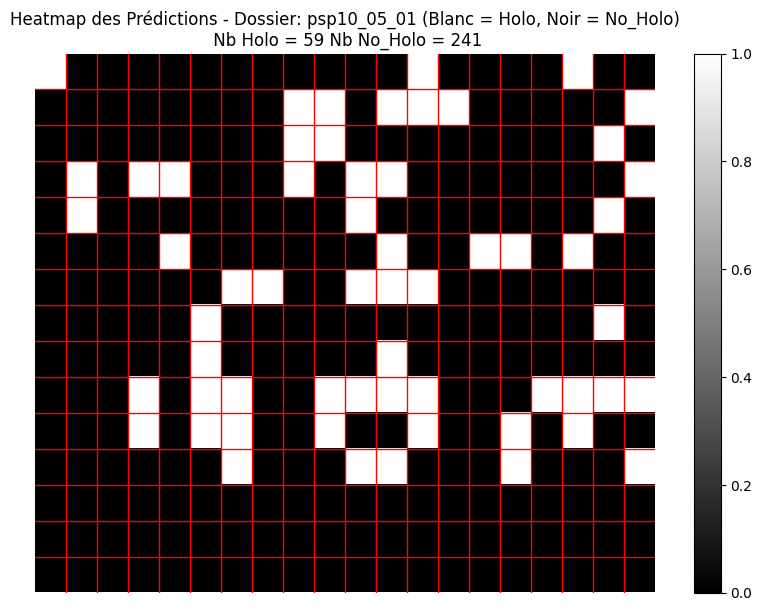

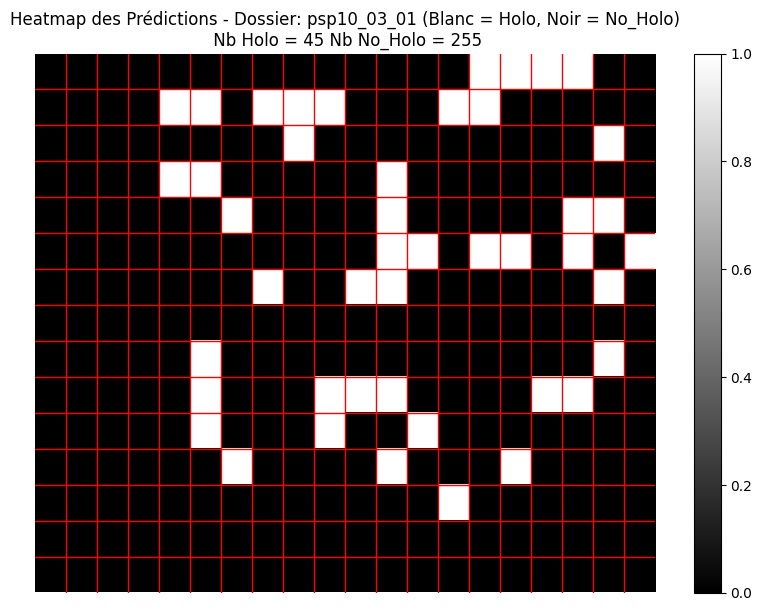

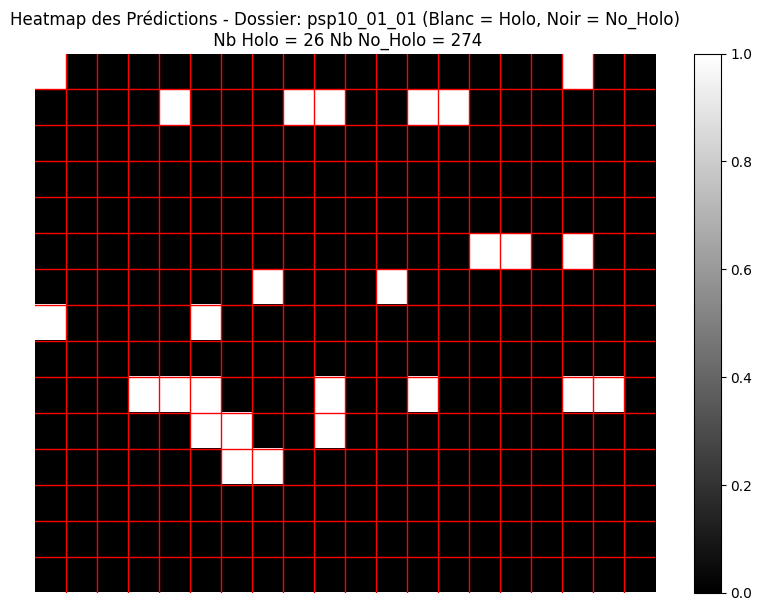

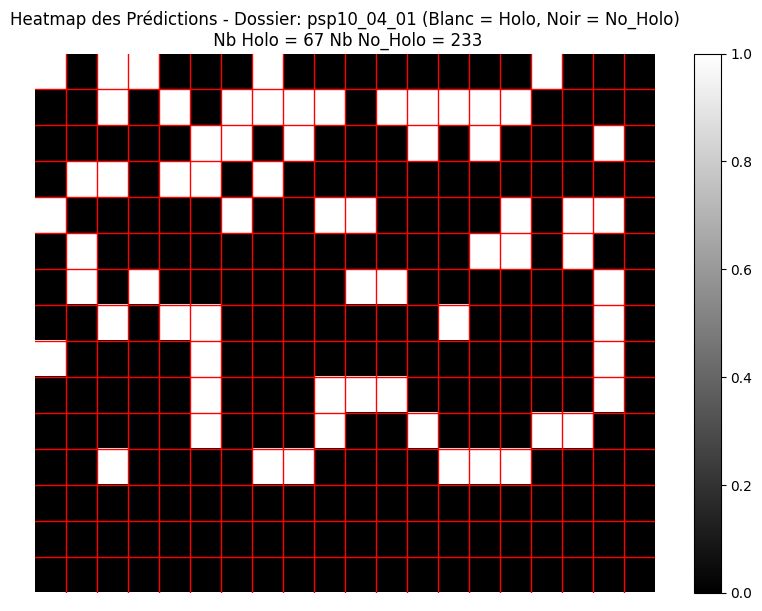

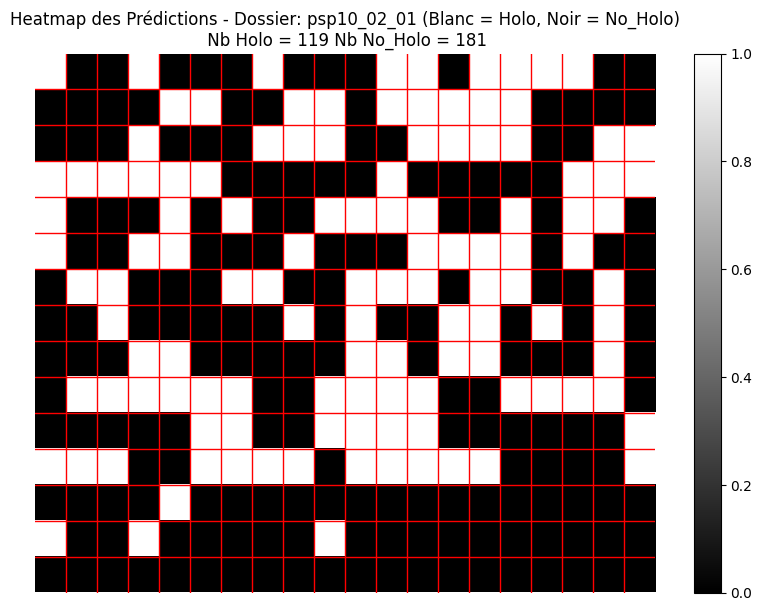

In [ ]:
# Afficher toutes les heatmaps
for i, (heatmap_data, nb_holo, nb_no_holo) in enumerate(heatmaps):
    plt.figure(figsize=(10, 7))  # Ajustez la taille de la figure si nécessaire
    plt.imshow(heatmap_data, cmap='binary_r', aspect='auto', vmin=0, vmax=1)

    # Ajouter des lignes rouges pour séparer les cases
    num_rows, num_cols = heatmap_data.shape
    for r in range(1, num_rows):
        plt.axhline(y=r - 0.5, color='red', linewidth=1)
    for c in range(1, num_cols):
        plt.axvline(x=c - 0.5, color='red', linewidth=1)

    plt.colorbar()
    plt.title(f'Heatmap des Prédictions - Dossier: {folders_to_process[i]} (Blanc = Holo, Noir = No_Holo)\n Nb Holo = {nb_holo} Nb No_Holo = {nb_no_holo}')
    plt.axis('off')
    plt.show()


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import re
import tensorflow as tf  # Assurez-vous d'importer tensorflow si ce n'est pas déjà fait

# Chemin du dossier contenant les fichiers ZIP
base_folder_path = '/content/photo_holo_copy'  # Chemin de base

# Fonction pour charger et prétraiter une image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch
    img_array /= 255.0  # Normaliser l'image
    return img_array

# Fonction de tri personnalisé pour les fichiers
def sort_nicely(l):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

# Charger votre modèle
model = tf.keras.models.load_model('/content/best_model_cnn.keras')

# Liste pour stocker les heatmaps
heatmaps = []

# Dossiers à traiter
folders_to_process = [f for f in os.listdir(base_folder_path) if os.path.isdir(os.path.join(base_folder_path, f))]

for folder in folders_to_process:
    # Répertoire contenant les images à prédire
    images_dir = os.path.join(base_folder_path, folder)

    # Charger et trier les chemins des images
    image_paths = [os.path.join(images_dir, img) for img in os.listdir(images_dir)]
    image_paths = sort_nicely(image_paths)

    # Initialiser un tableau pour stocker les prédictions
    predictions = []

    # Faire des prédictions pour chaque image
    for img_path in image_paths:
        img = load_and_preprocess_image(img_path)
        prediction = model.predict(img)
        predicted_class = 1 if prediction > 0.5 else 0  # 1 pour No_Holo, 0 pour Holo
        predictions.append(predicted_class)

    # Convertir les prédictions en tableau numpy
    predictions = np.array(predictions)

    # Compter le nombre de Holo et No_Holo
    nb_holo = np.sum(predictions == 1)  # Holo
    nb_no_holo = np.sum(predictions == 0)  # No_Holo

    # Reshape pour créer une matrice de 15x20 (15 lignes et 20 colonnes)
    heatmap_data = predictions.reshape((15, 20))

    # Stocker la heatmap dans la liste
    heatmaps.append((heatmap_data, nb_holo, nb_no_holo))


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━

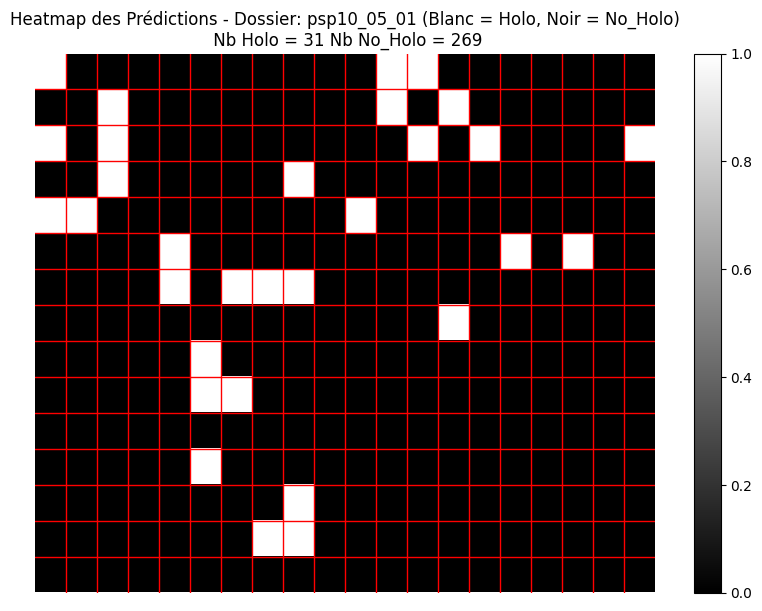

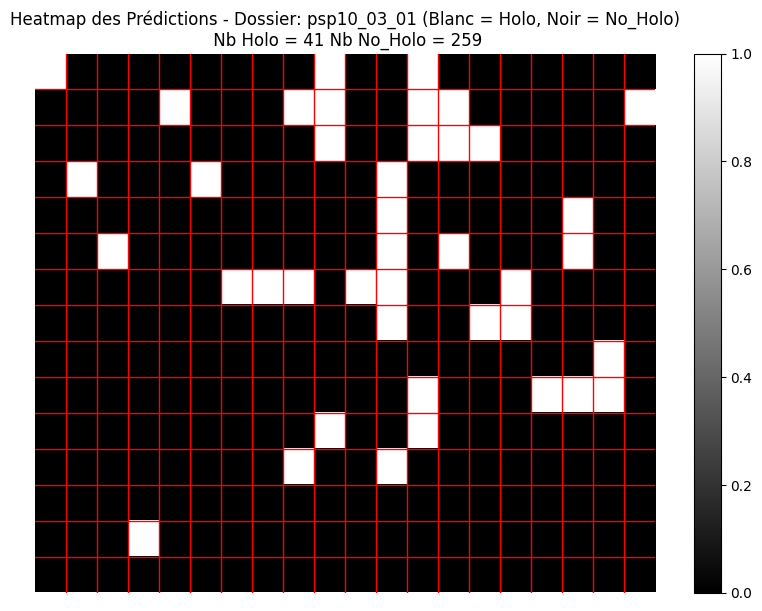

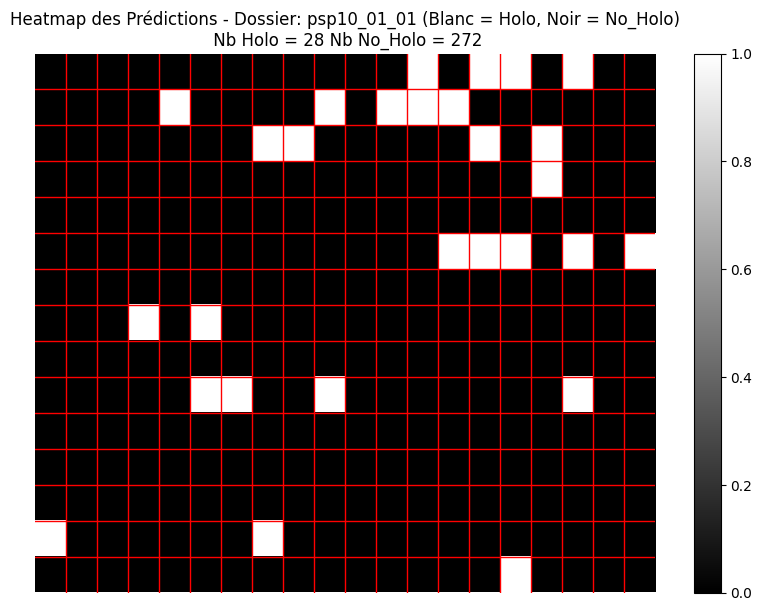

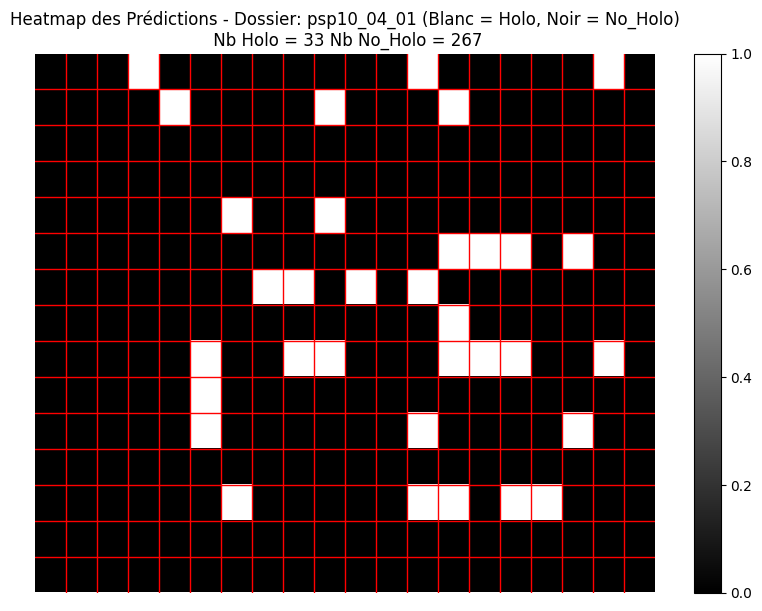

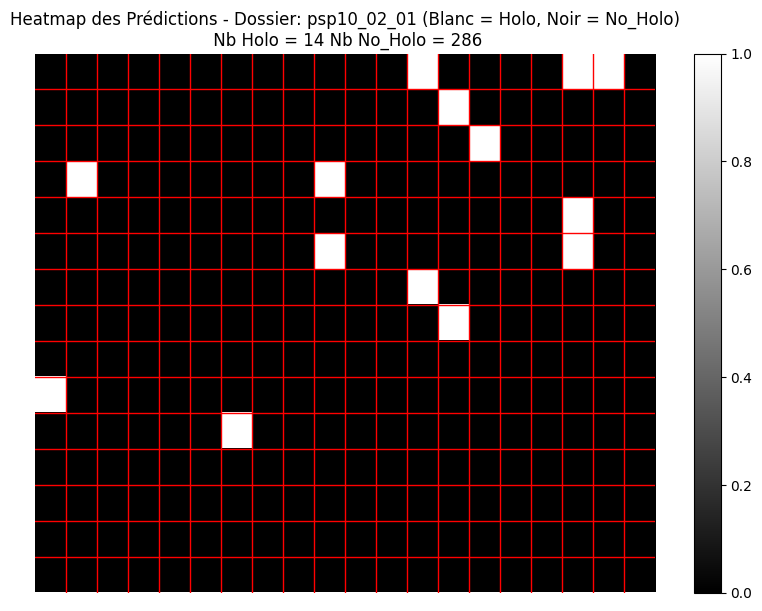

In [ ]:
# Afficher toutes les heatmaps
for i, (heatmap_data, nb_holo, nb_no_holo) in enumerate(heatmaps):
    plt.figure(figsize=(10, 7))  # Ajustez la taille de la figure si nécessaire
    plt.imshow(heatmap_data, cmap='binary_r', aspect='auto', vmin=0, vmax=1)

    # Ajouter des lignes rouges pour séparer les cases
    num_rows, num_cols = heatmap_data.shape
    for r in range(1, num_rows):
        plt.axhline(y=r - 0.5, color='red', linewidth=1)
    for c in range(1, num_cols):
        plt.axvline(x=c - 0.5, color='red', linewidth=1)

    plt.colorbar()
    plt.title(f'Heatmap des Prédictions - Dossier: {folders_to_process[i]} (Blanc = Holo, Noir = No_Holo)\n Nb Holo = {nb_holo} Nb No_Holo = {nb_no_holo}')
    plt.axis('off')
    plt.show()


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import re
import tensorflow as tf  # Assurez-vous d'importer tensorflow si ce n'est pas déjà fait

# Chemin du dossier contenant les fichiers ZIP
base_folder_path = '/content/pseudo_holo_copy'  # Chemin de base

# Fonction pour charger et prétraiter une image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch
    img_array /= 255.0  # Normaliser l'image
    return img_array

# Fonction de tri personnalisé pour les fichiers
def sort_nicely(l):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

# Charger votre modèle
model = tf.keras.models.load_model('/content/best_model_cnn.keras')

# Liste pour stocker les heatmaps
heatmaps = []

# Dossiers à traiter
folders_to_process = [f for f in os.listdir(base_folder_path) if os.path.isdir(os.path.join(base_folder_path, f))]

for folder in folders_to_process:
    # Répertoire contenant les images à prédire
    images_dir = os.path.join(base_folder_path, folder)

    # Charger et trier les chemins des images
    image_paths = [os.path.join(images_dir, img) for img in os.listdir(images_dir)]
    image_paths = sort_nicely(image_paths)

    # Initialiser un tableau pour stocker les prédictions
    predictions = []

    # Faire des prédictions pour chaque image
    for img_path in image_paths:
        img = load_and_preprocess_image(img_path)
        prediction = model.predict(img)
        predicted_class = 1 if prediction > 0.5 else 0  # 1 pour No_Holo, 0 pour Holo
        predictions.append(predicted_class)

    # Convertir les prédictions en tableau numpy
    predictions = np.array(predictions)

    # Compter le nombre de Holo et No_Holo
    nb_holo = np.sum(predictions == 1)  # Holo
    nb_no_holo = np.sum(predictions == 0)  # No_Holo

    # Reshape pour créer une matrice de 15x20 (15 lignes et 20 colonnes)
    heatmap_data = predictions.reshape((15, 20))

    # Stocker la heatmap dans la liste
    heatmaps.append((heatmap_data, nb_holo, nb_no_holo))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━

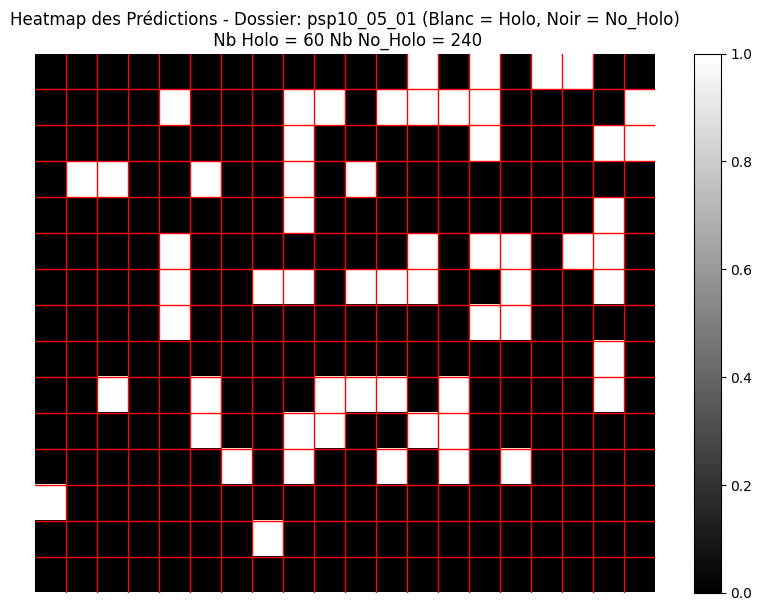

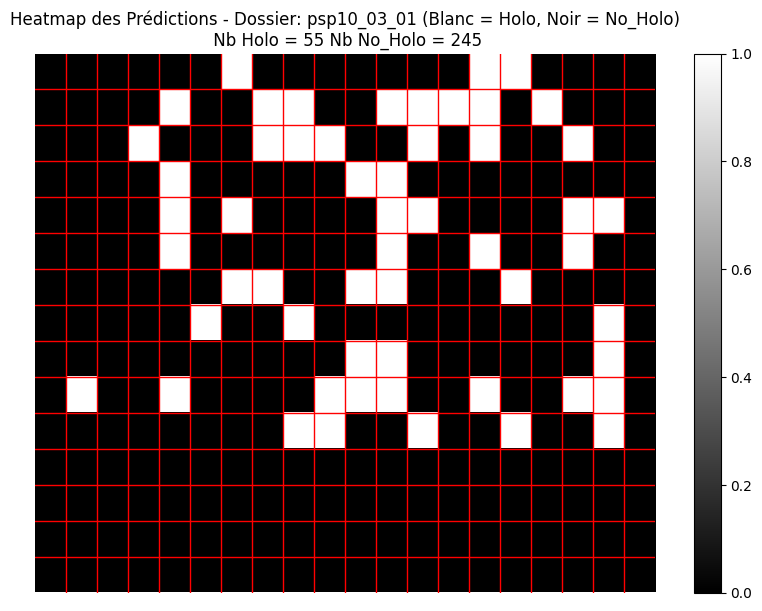

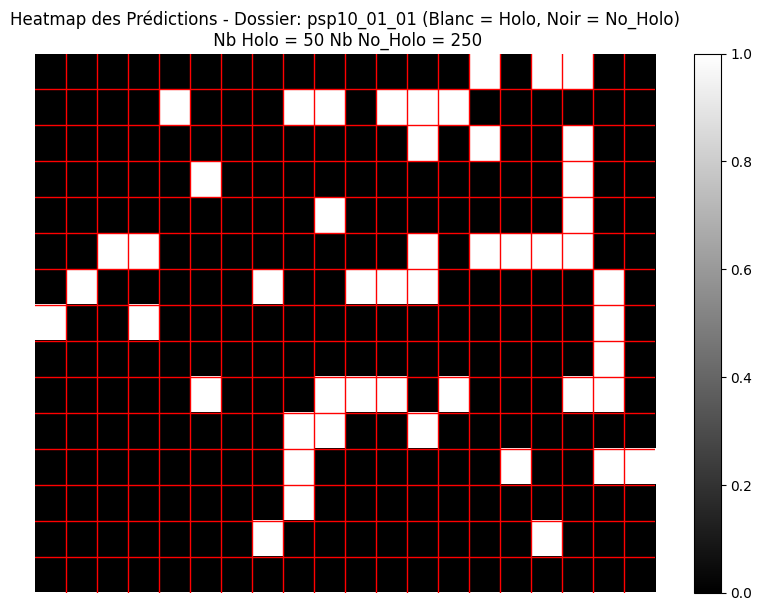

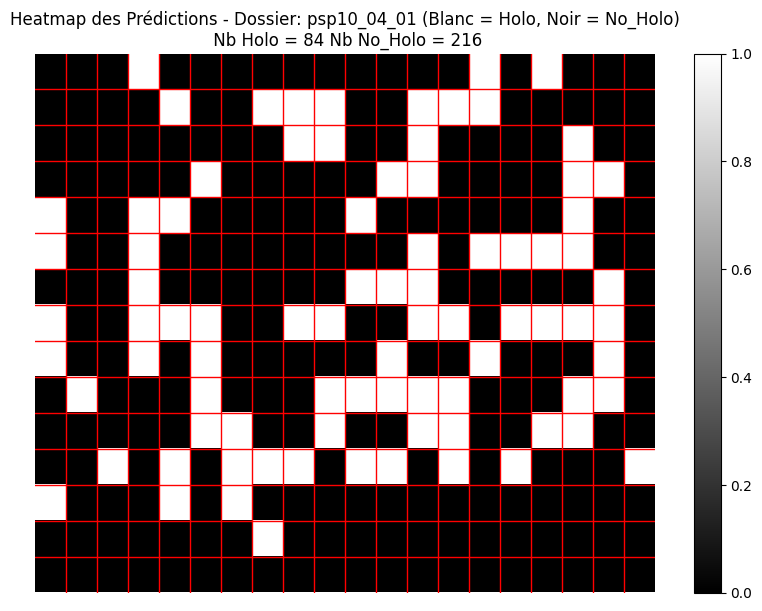

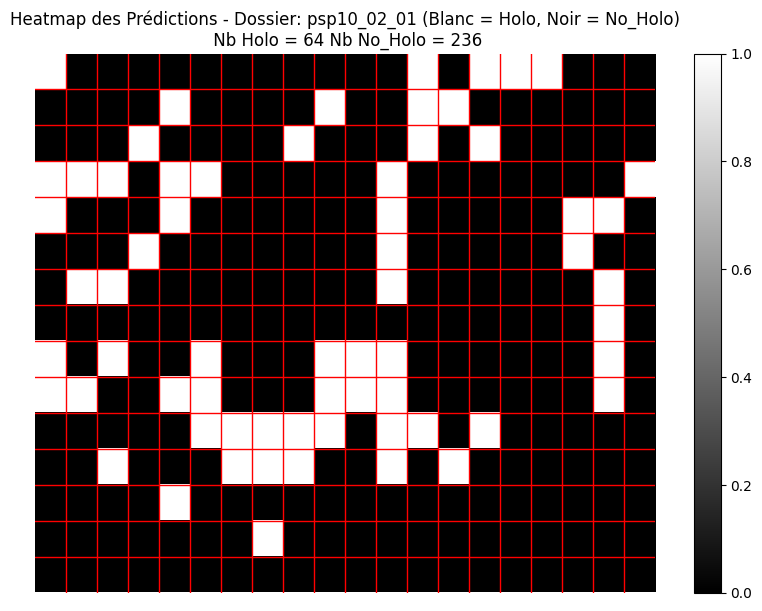

In [ ]:
# Afficher toutes les heatmaps
for i, (heatmap_data, nb_holo, nb_no_holo) in enumerate(heatmaps):
    plt.figure(figsize=(10, 7))  # Ajustez la taille de la figure si nécessaire
    plt.imshow(heatmap_data, cmap='binary_r', aspect='auto', vmin=0, vmax=1)

    # Ajouter des lignes rouges pour séparer les cases
    num_rows, num_cols = heatmap_data.shape
    for r in range(1, num_rows):
        plt.axhline(y=r - 0.5, color='red', linewidth=1)
    for c in range(1, num_cols):
        plt.axvline(x=c - 0.5, color='red', linewidth=1)

    plt.colorbar()
    plt.title(f'Heatmap des Prédictions - Dossier: {folders_to_process[i]} (Blanc = Holo, Noir = No_Holo)\n Nb Holo = {nb_holo} Nb No_Holo = {nb_no_holo}')
    plt.axis('off')
    plt.show()
